In [ ]:
import shap
import torch
from torch import nn
import json
from torchmetrics import R2Score

In [ ]:
inputSize = 573
net = nn.Sequential(nn.Linear(inputSize, 8192),
                    nn.LeakyReLU(),
                    nn.Linear(8192, 4096),
                    nn.LeakyReLU(),
                    nn.Linear(4096, 2048),
                    nn.LeakyReLU(),
                    nn.Linear(2048, 1024),
                    nn.LeakyReLU(),
                    nn.Linear(1024, 512),
                    nn.LeakyReLU(),
                    nn.Linear(512, 256),
                    nn.LeakyReLU(),
                    nn.Linear(256, 128),
                    nn.LeakyReLU(),
                    nn.Linear(128, 64),
                    nn.LeakyReLU(),
                    nn.Linear(64,32),
                    nn.LeakyReLU(),
                    nn.Linear(32,1))

In [ ]:
net.load_state_dict(torch.load("../trained_models/1680378202-8192-573-AllFields.pt"))

In [ ]:
testSetX = torch.load("../dataset/testSetX.pt")
testSetY = torch.load("../dataset/testSetY.pt")
# testSetX = testSetX.to(device)
# testSetY = testSetY.to(device)
print(testSetX.shape)
print(testSetY.shape)

In [ ]:
with open ("../dataset/columns.json", "r") as f:
	columns = json.load(f)

In [ ]:

net = net.eval()

with torch.no_grad():
	pred = net(testSetX)
	print(pred.shape)


In [ ]:
pred = pred.squeeze(1)

In [ ]:
print(pred.shape)
print(testSetY.shape)
r2score = R2Score()
r2score(pred, testSetY)
r2score = r2score.compute()
print(r2score)

In [38]:
# Use the DeepExplainer to explain the model
torch.set_grad_enabled(True)
background = testSetX[:100]
e = shap.DeepExplainer(net, background)

In [40]:
shap_values = e.shap_values(testSetX[0:100])

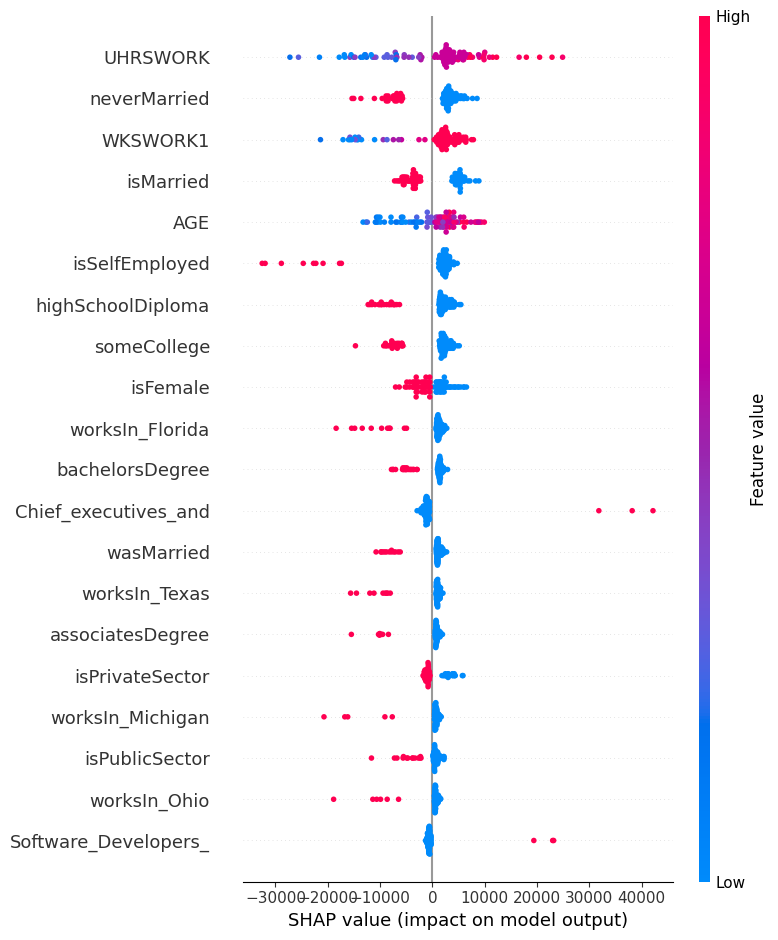

In [41]:
for i in range(0, len(columns)):
    if columns[i].find("occupation_") != -1:
        columns[i] = columns[i][11:]
    columns[i] = columns[i][:20]

shap.summary_plot(shap_values, testSetX[0:100], feature_names=columns)

In [ ]:
shap.plots.bar(shap_values, max_display=20, feature_names=columns)